In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

# 1 Data Exploration

## 1.1 Kernel Density Estimation
- Application: Kernel Density Estimation (KDE) is used to find the true distribution of the data and can be used to generate new data points once those parameters are found
- Description: KDE is a non-parametric way of estimation to get probability density function to understand the distribution of the underlying data
- Functionality:
    * We start by selecting a kernel function (i.e. Gaussian, triangle) and generate such function for each data point; we usually apply Gaussian
    * To get a true representation of our data, we then aggregate those functions acorss data points
    * The resulting kernel density estimate is hence the aggregation of all individual kernel functions
    * The first parameter to specify is the bandwith, determining the width of a kernel function and hence the smoothness of the resulting curve. The higher the bandwidth, the smoother the fitted distribution line.
    * The second parameter to specify is the distribution of the kernel function. The bandwidth also effects the individual kernel functions. The lower the bandwidth, the higher the kernel function
    * The bandwidth can be calculated as: $1.06 * min(\sigma, \frac{IQR}{1.34}) * n^ {\!-1/5}$
    * Alternatively, we can plot the KDE with different parameters and observe and finetune the results
- Limitations: Histogramms might make the job if I'm just interested in the distribution of the data

In [98]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KernelDensity

Here is one new datapoints: [[5.46939116]]


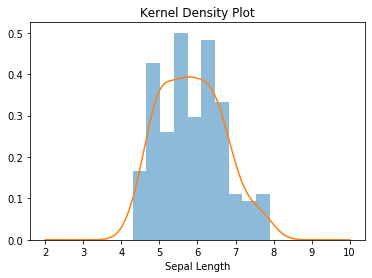

In [99]:
# load data
iris = load_iris()
iris = pd.DataFrame(iris['data'], columns = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
x = iris['SepalLengthCm'][:, np.newaxis]

# determine bandwidth and support
bw = 1.06 * x.std() * len(x) ** (-1/5)
support = np.linspace(2, 10, len(x))

# initialize KDE
kde = KernelDensity(kernel = 'gaussian', bandwidth = bw)

# fit kde
kde.fit(x)

# create new data
new_data = kde.sample(1, random_state=3)
print('Here is one new datapoints:', new_data)

# find support values (log density model on the data)
y = kde.score_samples(support[:, np.newaxis])

# plot the result
plt.hist(x, bins=10, alpha = 0.5, density = True)
plt.plot(support, np.exp(y))
plt.xlabel('Sepal Length')
plt.title('Kernel Density Plot')
plt.show()

## 1.2 Kolmogorov-Smirnov Test
- Application: The Kolmogorov-Smirnov Test (KS-Test) is applied to analyze the distribution of datasets
- Description: The KS-Test compares a sample with a reference probability distribution (one-sample K–S test), or compares two samples (two-sample K–S test); it hence provides insight into the godness of fit of samples
- Functionality:
    * The test quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, or between the empirical distribution functions of two samples
    * The null hypothesis is that the sample is drawn from the reference distribution (in the one-sample case) or that the samples are drawn from the same distribution (in the two-sample case)
- Limitations: The test only applies to continuous distributions

In [100]:
from scipy import stats

In [108]:
# create random normal distribution
x = np.random.normal(0, 1, 100)

# apply ks-test
stats.kstest(x, 'norm')

KstestResult(statistic=0.05976890513584643, pvalue=0.8673278748019739)

The first value is the ks-test statistic. The second value is the p-value. Since the p-value > 0.05, we do not reject the null hypothesis and can conclude that the distribution is indeed normally distributed.

## 2.3 Data Interpolation
- Application: There are different ways to deal with missing data, such as dropping it or hard-coding new values; interpolation is however a more sophisticated technique to fill missing data 
- Description: There are different interpolation methods available in the pandas .interpolate() function such as linear, nearest etc.; this also works on categorical data

In [8]:
# load data
df = pd.DataFrame({"A":[12, 4, 5, None, 1], 
                   "B":[1, 2, 54, 3, None], 
                   "C":[20, 16, None, 3, 8], 
                   "D":[14, 3, None, None, 6]})

# interpolate missing data
df = df.interpolate()
print(df)

      A     B     C     D
0  12.0   1.0  20.0  14.0
1   4.0   2.0  16.0   3.0
2   5.0  54.0   9.5   4.0
3   3.0   3.0   3.0   5.0
4   1.0   3.0   8.0   6.0
